<a href="https://colab.research.google.com/github/1st-award/andong_2021_2_1/blob/main/Python/%ED%95%84%EA%B8%B0%20%EC%82%AC%EB%B3%B8/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%99%9C%EC%9A%A9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 안동 기온 데이터 분석(1973/01/01 ~ 2020/12/31)

## 공공 데이터 얻기
1. 기상자료개방포털(https://data.kma.go.kr/)접속
2. 기후통계분석 >> 통계분석 >> 기온분석 메뉴로 들어가서
3. 기간 설정: 1973년 1월 1일부터 2020년 12월 31일까지
4. 지역: 경상북도 안동
5. 검색 버튼 클릭
6. 그래프가 나타나면[csv다운로드] 버튼 클릭
7. 'andongTemp.csv'라는 이름으로 저장
8. 다운로드한 csv파일을 메모장 프로그램으로 열고 1~7행을 모두 삭제한 후 'utf-8' 형식으로 다시 저장
9. andongTemp.csv 파일을 현재 작업중인 구글 드라이브에 업로드한다.

- csv: comma-separated values, 몇 가지 필드를 쉼표로 구분한 텍스트 데이터 및 텍스트 파일

## CSV파일 열기

### 구글 드라이브에 저장된 파일을 구글 코랩으로 불러오기

#### 구글 드라이브를 연동할 계정 인증하기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

#### 불러올 파일의 경로와 이름 설정

In [ ]:
import numpy as np
import pandas as pd
temp_data =pd.read_csv('/gdrive/My Drive/Python/andongTemp.csv', encoding='utf-8')
temp_data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1973-01-01,136,-0.5,-4.6,4.0
1,1973-01-02,136,-2.3,-8.2,3.0
2,1973-01-03,136,-4.2,-8.7,0.1
3,1973-01-04,136,-1.8,-7.0,4.1
4,1973-01-05,136,-1.3,-5.5,5.5
...,...,...,...,...,...
15821,2020-12-27,136,0.3,-3.6,5.4
15822,2020-12-28,136,1.8,-5.0,11.0
15823,2020-12-29,136,1.3,-4.0,8.2
15824,2020-12-30,136,-7.8,-11.2,0.0


#### 지점 컬럼 삭제

In [ ]:
temp_data.drop('지점', axis=1, inplace=True)
temp_data

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1973-01-01,-0.5,-4.6,4.0
1,1973-01-02,-2.3,-8.2,3.0
2,1973-01-03,-4.2,-8.7,0.1
3,1973-01-04,-1.8,-7.0,4.1
4,1973-01-05,-1.3,-5.5,5.5
...,...,...,...,...
15821,2020-12-27,0.3,-3.6,5.4
15822,2020-12-28,1.8,-5.0,11.0
15823,2020-12-29,1.3,-4.0,8.2
15824,2020-12-30,-7.8,-11.2,0.0


#### 날짜 컬럼을 인덱스로 지정하기

In [ ]:
temp_data.set_index('날짜', inplace=True)
temp_data

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
1973-01-01,-0.5,-4.6,4.0
1973-01-02,-2.3,-8.2,3.0
1973-01-03,-4.2,-8.7,0.1
1973-01-04,-1.8,-7.0,4.1
1973-01-05,-1.3,-5.5,5.5
...,...,...,...
2020-12-27,0.3,-3.6,5.4
2020-12-28,1.8,-5.0,11.0
2020-12-29,1.3,-4.0,8.2


## 안동에서 가장 더웠던 날과 가장 추웠던 날은 언제일까?

### 가장 더웠던 날과 그날의 기온 찾기 - 방법(1)

In [ ]:
maxTemp = -999 # 정수형 변수
maxDate = ''
date = temp_data.index
for x in range(len(temp_data)):
  highest = float(temp_data.iloc[x, 2]) # csv는 문자로 저장되기 때문
  if maxTemp < highest:
    maxTemp = highest
    maxDate = date[x]
print('기상 관측 이래 안동에서 가장 더웠던 날 :', maxDate)
print('안동의 최고기온 :', maxTemp,'도')

### 가장 더웠던 날과 그날의 기온 찾기 - 방법(2)

In [ ]:
max_date = temp_data['최고기온(℃)'].idxmax() # 최고기온의 최대값이 있는 행의 인덱스반환
max_temp = temp_data.loc[max_date] # 최고기온의 최대값이 있는 행의 모든 정보 반환
print('기상 관측 이래 안동에서 가장 더웠던 날 :', max_date)
print('안동의 최고기온 :', max_temp[-1], '도')

### 가장 추웠던 날과 그날의 기온 찾기 - 방법(1)

In [ ]:
minTemp = 999 # 정수형 변수
maxDate = '' # 문자열형 변수
date = temp_data.index
for x in range(len(date)):
  lowest = float(temp_data.iloc[x, 1])
  if minTemp > lowest:
    minTemp = lowest
    minDate = date[x]
print('기상 관측 이래 안동에서 가장 추웠던 날 :', minDate)
print('안동의 최저 기온 :', minTemp, '도')

### 가장 추웠던 날과 그날의 기온 찾기 - 방법(2)

In [ ]:
min_date = temp_data['최저기온(℃)'].idxmin() # 최저기온의 최소값이 있는 행의 인덱스 반환
min_temp = temp_data.loc[min_date] # 최저기온의 최소값이 있는 행의 모든 정보 반환
print('기상 관측 이래 안동에서 가장 추웠던 날 :', min_date)
print('안동의 최저 기온 :', min_temp[1], '도')

## 출생 이후 매년 생일날의 최고 기온과 최저 기온의 변화를 라인 그래프로 그려보기
(ex. 2000년 8월 1일생)

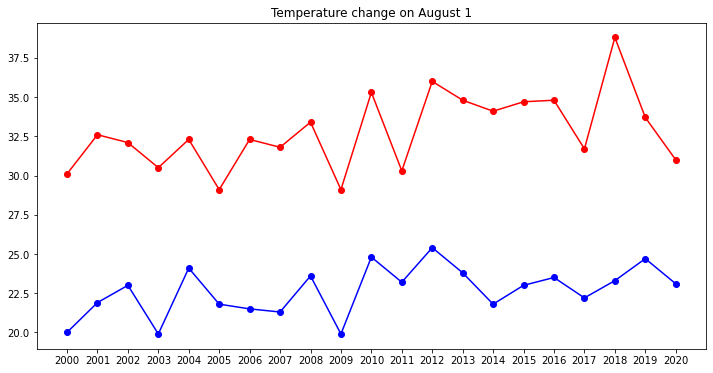

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

temp_data = pd.read_csv('/gdrive/My Drive/Python/andongTemp.csv', encoding='utf-8')
temp_data.set_index('날짜', inplace=True)
highest_temp = [] # 2000년 8월 1일부터 2020년 8월 1일까지 하루동안의 최고 기온
lowest_temp = [] # 2000년 8월 1일부터 2020년 8월 1일까지 하루동안의 최저 기온
date = temp_data.index
year = []
for a in range(len(temp_data)):
  if int(date[a].split('-')[0]) >= 2000:
    if date[a].split('-')[1] == '08' and date[a].split('-')[2] == '01':
      row = temp_data.iloc[a]
      highest_temp.append(float(row[-1]))
      lowest_temp.append(float(row[-2]))
      year.append(int(date[a].split('-')[0]))

plt.title('Temperature change on August 1')
plt.plot(highest_temp, 'ro-') # 빨간색 표식 o 실선
plt.plot(lowest_temp, 'bo-') # 파란색 표식 o 실선
plt.xticks(np.arange(len(year)), year)
plt.rcParams["figure.figsize"] = (12, 6) # 가로 12인치 세로 6인치
plt.show()

## 그래프에 한글로 제목 표시

### 한글 폰트 사용하기

In [ ]:
# 폰트 설치
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

[런타임] - [런타임 다시 시작]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12
fm._rebuild()

### 위 "2000년 이후 매년 8월 1일의 최고 기온과 최저 기온의 변화를 라인 그래프로 그려보기" 아래의 코드를 다시 실행

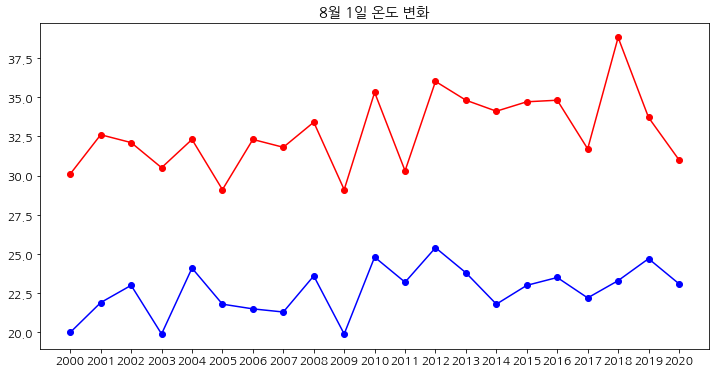

In [ ]:
plt.title('8월 1일 온도 변화')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.plot(highest_temp, 'ro-')
plt.plot(lowest_temp, 'bo-')
plt.show()

## 최고 온도와 최저 온도를 막대 그래프로 그리기

In [ ]:
x_pos = np.arange(len(year))
plt.bar(x_pos-0.2, highest_temp, label='최고온도', width=0.4, color='red')
plt.bar(x_pos+0.2, lowest_temp, label='최저온도', width=0.4, color='blue')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.title('2000년 이후 매년 8월 1일 온도')
plt.legend()
plt.show()